# Сборный проект: Исследование рынка компьютерных игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание датасета**

Необходимая для анализа информация записана в файле `games.csv`:

- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### .   Загрузка данных

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:    
    data = pd.read_csv('D:/Данные/games.csv')

display(data.head())
display(data.tail())
display(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**Промежуточный вывод**

После записи датасета в переменную `data` и первичного знакомства с данными видим следующее:

Датафрейм содержит 11 столбцов и 16715 строк. 
Пять столбцов с информацией о названии, платформе, жанре, оценке пользователей и рейтинге игры имеют строковый тип данных. 
Остальные столбцы, описывающие год выпуска, продажи в Северной Америке, продажи в Европе, продажи в Японии, продажи в других странах и оценку критиков имеют тип данных числа с плавающей точкой.

Также видим, что датасет содержит пропуски.

### .   Предобработка данных

In [3]:
# переименование столбцов (преобразование в нижний регистр)
data.columns = [col.lower() for col in data.columns]

# проверка
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
# преобразование типов данных
data.year_of_release = data.year_of_release.astype('Int64')

In [6]:
# столбец содержит аббревиатуру 'tbd', что означает, рейтинг игры не определен, поэтому заполним пропусками данные ячейки.
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [7]:
# для экономии памяти преобразуем столбцы с типом float64 во float32
float_cols = data.select_dtypes('float').columns

data.na_sales = data.na_sales.astype('float32')
data.eu_sales = data.eu_sales.astype('float32')
data.jp_sales = data.jp_sales.astype('float32')
data.other_sales = data.other_sales.astype('float32')
data.critic_score = data.critic_score.astype('float32')
data.user_score = data.user_score.astype('float32')

# итоговая проверка
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int64(1), float32(6), object(4)
memory usage: 1.0+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


In [9]:
# Определить кол-во пропусков по столбцам
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [10]:
display(data[data['name'].isna() == True])

# Выведя на экран две строки с пропусками в колонке с названием игры видим, 
# что в данных строках также пропущены значения в столбце с жанром.

# удалим данные строки, т.к. они составляют менее доли процента от всех строк датафрейма - это не повлияет на анализ.
data = data[data['name'].isna() == False]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#Пропуски в рейтинге ESRB - 6676 штук, составляют почти 42 % от всего объема датафрейма.

# заполним пропуски значением "no_rating", чтобы в анализе не исключать игры, у которых нет рейтинга.

data.loc[(data.rating.isna() == True), 'rating'] = 'no_rating'

# проверка 
data['rating'].value_counts()

no_rating    6764
E            3990
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: rating, dtype: int64

In [12]:
#Пропуски года релиза - 269 штук.

# проверка, что одновременно с пропусками в этом столбце пристуствуют пропуски в столбцах с рейтингом, оценками пользователей и критиков
display(data.query('year_of_release.isna() == True').query('rating.isna()')['name'].count())
display(data.query('year_of_release.isna() == True').query('critic_score.isna()')['name'].count())
display(data.query('year_of_release.isna() == True').query('user_score.isna()')['name'].count())

# действительно, в строках с пропусками в столбце year_of_release часто встречаются пропуски и в других столбцах, 
# поэтому удаляем пропуски - около 1,6 % строк от объема датафрейма

data = data[data['year_of_release'].isna() == False]

0

115

142

In [13]:
# Остаются необработанными пропуски в столбцах с оценкой критикой и пользователей и рейтингом игр.
# Проверим, связано ли отсутствие данных с ранним годом выпуска игры.
# Создадим сводную таблицу, содержающую доли от общего кол-во игр в разрезе года выпуска.
# Псотроим графики по данным сводной.

data_test = data.groupby('year_of_release').agg(
    total_count=('year_of_release', 'count'), 
    total_critic_score=('critic_score', 'count'), 
    total_user_score=('user_score', 'count'), 
    total_rating=('rating', 'count')).reset_index() 

data_test['critic_score_prop'] = round((data_test['total_critic_score'] / data_test['total_count']) * 100)
data_test['user_score_prop'] = round((data_test['total_user_score'] / data_test['total_count']) * 100)
data_test['rating_prop'] = round((data_test['total_rating'] / data_test['total_count']) * 100)

display(data_test)

,year_of_release,total_count,total_critic_score,total_user_score,total_rating,critic_score_prop,user_score_prop,rating_prop
0,1980,9,0,0,9,0.0,0.0,100.0
1,1981,46,0,0,46,0.0,0.0,100.0
2,1982,36,0,0,36,0.0,0.0,100.0
3,1983,17,0,0,17,0.0,0.0,100.0
4,1984,14,0,0,14,0.0,0.0,100.0
5,1985,14,1,1,14,7.0,7.0,100.0
6,1986,21,0,0,21,0.0,0.0,100.0
7,1987,16,0,0,16,0.0,0.0,100.0
8,1988,15,1,1,15,7.0,7.0,100.0
9,1989,17,0,0,17,0.0,0.0,100.0


<AxesSubplot:title={'center':'Доля игр с присвоенным рейтингом от общего кол-во игр, %'}, xlabel='Год выпуска', ylabel='Доля, %'>

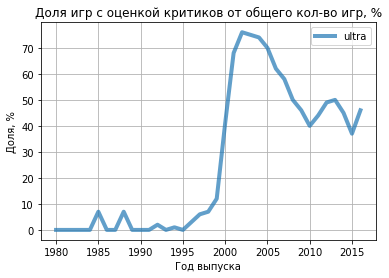

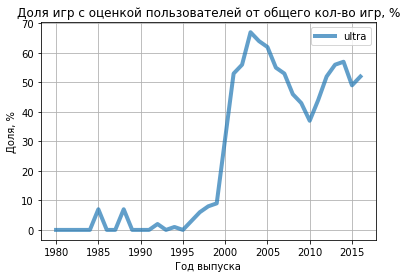

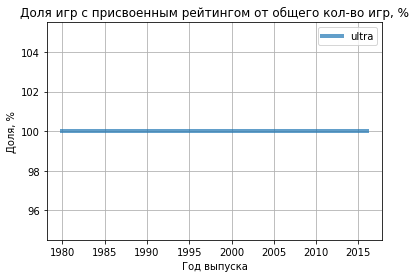

In [14]:
data_test.plot(
    kind='line',
    x='year_of_release',
    y='critic_score_prop',
    linewidth=4,
    alpha=0.7,
    label='ultra',
    grid=True,
    title='Доля игр с оценкой критиков от общего кол-во игр, %',
    xlabel='Год выпуска',
    ylabel='Доля, %'
)
data_test.plot(
    kind='line',
    x='year_of_release',
    y='user_score_prop',
    linewidth=4,
    alpha=0.7,
    label='ultra',
    grid=True,
    title='Доля игр с оценкой пользователей от общего кол-во игр, %',
    xlabel='Год выпуска',
    ylabel='Доля, %'
)
data_test.plot(
    kind='line',
    x='year_of_release',
    y='rating_prop',
    linewidth=4,
    alpha=0.7,
    label='ultra',
    grid=True,
    title='Доля игр с присвоенным рейтингом от общего кол-во игр, %',
    xlabel='Год выпуска',
    ylabel='Доля, %'
)

In [15]:
# Из данных графиков и сводной таблицы видим, что начиная с 2000 года практически без провалов доля не менее 40 % 
# игр, оценных критиками и c присвоенным рейтингом игры и не менее 30 % игр, оцененных пользователями.

print(data_test.query('year_of_release >= 2000')['critic_score_prop'].median())
print(data_test.query('year_of_release >= 2000')['user_score_prop'].median())
print(data_test.query('year_of_release >= 2000')['rating_prop'].median())

# Предлагаю не заполнять пропуски в этих столбцах.

50.0
53.0
100.0


In [16]:
# дубли в названиях
print(data['platform'].sort_values().unique())
print()
print(data['genre'].sort_values().unique())
print()
print(data['rating'].sort_values().unique())

print()
# дубли строк
print(data.duplicated().sum())

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']

['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' 'no_rating']

0


In [17]:
# проверка неявных дубликатов по связке имя-платформа-год выпуска

display(data[data.duplicated(subset=['name','platform', 'year_of_release']) == True])

# 2 строки - удаляем
data = data.drop_duplicates(subset=['name','platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [18]:
# суммарные продажи

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# проверка
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,no_rating,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,no_rating,31.380001


**Промежуточный вывод**

Преобразованы названия столбцов в нижний регистр.

Тип данных столбца user_score изменен из строкового в вещественный по аналогии со столбцом critic_score,
предварительно было решено аббревиатуру 'tbd' ('to be determined') в столбце с оценкой пользователей считать, что оценка отсутствует  и заменить значения 'tbd' на пропуски.

Также был создан новый столбец "total_sales" с суммарными продажами во всех регионах.

Обнаружены и удалены два дубликата по связке имя-платформа-год выпуска.

Найдены и удалены строки с пропущенными значениями в столбцах "name" и "genre" и "year_of_release" (около 1,6 % строк от объема датафрейма).

Пропуски в колонке с рейтингом игр заменены на значение 'no_rating' для того, чтобы в анализе не исключать игры, у которых нет рейтинга.

Пропуски в столбцах с оценкой критиков и пользователей было решено не обрабатывать.

Причины, которые могли привести к пропускам в данных: 
- до 2000 года рынок игр был развит недостаточно, оценки и рейтинг не выставлялись.
- пропуски позже 2000 года можно объяснить тем, что возможно на некоторых платформах и для видов игр оценки и рейтинги не выставляются.
- возможно техническая причина пропусков, такая как: система не смогла распознать символы в определенных ячейках или заполнить в нужном формате данные при сборке датасета.

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

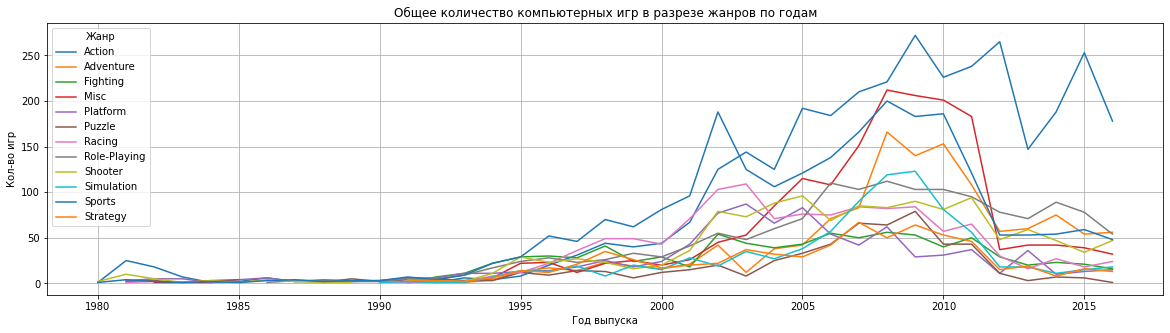

In [20]:
ax = (data.pivot_table(    
    index='genre',
    columns='year_of_release',
    values='platform',
    aggfunc=['count']
).droplevel(0, axis=1)
.T.plot.line(grid=True, figsize=(20,5),
    title='Общее количество компьютерных игр в разрезе жанров по годам',
    xlabel='Год выпуска',
    ylabel='Кол-во игр'))
ax.legend(title='Жанр', loc='best')

plt.show()

**Вывод**

Из данных графика видим, что до 2000 года выпускалось небольшое количество игр по сравнению с более поздними периодами: не более 50 штук, за исключением игр жанра "Action", в этом жанре выпускалось по 60-70 игр до 2000 года. 
Далее наблюдаем плавный рост в общем количестве выпусков игр, за некоторыми исключениями, до ориентировочно 2008-2009 гг.
После наблюдаем падение рынка до 2012 г.

После 2012 г. в целом видим выпрямление в количестве выпусков игр, без резких скачков и падений.

Отдельно стоит выделить жанр "Action", который занимает половину всего рынка компьютерных игр. 

В период с 2000 г. по 2011 г. стремительно развивался рынок игр для консолей жанра "Misc", далее после 2011 г. произошло резкое падение в количестве выпускаемых игр, вероятно связанное с тем, что пользователи выбирают игры на ПК.

В 2015 году рынок по количеству выпускаемых игр находится примерно на одном уровне с 2001 годом, за исключением лидера, жанра "Action".

Исходя из вышеизложенного, делаем вывод, что для анализа можем брать период с 2001 года.

#### Как менялись продажи по платформам? 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
# группируем количество игр по платформам для определения платформ с наибольшими суммарными продажами
data_sub = data.pivot_table(index='platform', values='genre', aggfunc=['count']).droplevel(0, axis=1)
# записываем в список платформы с кол-вом игр больше 500
data_sub = data_sub.query('genre > 500')
# формируем датафрейм с платформами с кол-вом игр больше 500
data_sub = data.query('platform in @data_sub.index')

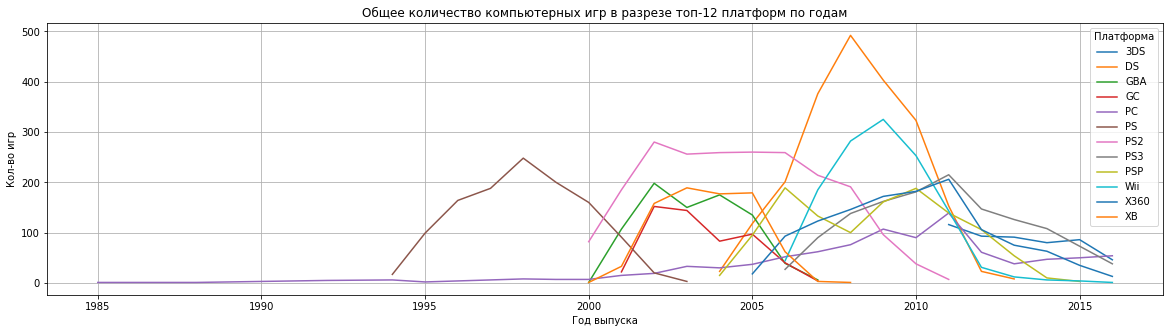

In [22]:
# строим график по полученному датафрейму
ax = (data_sub.pivot_table(    
    index='platform',
    columns='year_of_release',
    values='genre',
    aggfunc=['count']
).droplevel(0, axis=1)
.T.plot.line(grid=True, figsize=(20,5),
    title='Общее количество компьютерных игр в разрезе топ-12 платформ по годам',
    xlabel='Год выпуска',
    ylabel='Кол-во игр'))
ax.legend(title='Платформа', loc='best')

plt.show()

**Вывод**

За представленный в датасете период с 1985 по 2016 гг. появились и исчезли шесть платформ: PS и DS существовали 9 лет, GBA и GC - 6 лет, PS2 - 11 лет, XB - 8 лет. 

Таким образом, средний срок существования платформ без учета PC - 8,5 лет.

Если смотреть на крайнюю правую часть графика, примерно с 2013 года наблюдается снижение в количестве выпущенных игр на всех платформах кроме персональных компьютеров.

#### Возьмите данные за соответствующий актуальный период. 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

<AxesSubplot:title={'center':'Динамика общего кол-ва игр за период с 1980 по 2016 гг.'}, xlabel='Год выпуска игры', ylabel='Кол-во игр'>

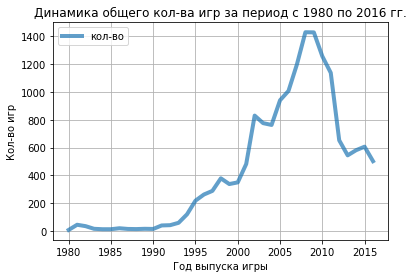

In [24]:
# построим общий график с динамикой выпуска игр за весь период
(data.groupby('year_of_release')
.agg(total_count=('year_of_release', 'count')).reset_index() 
.plot(
    kind='line',
    x='year_of_release',
    y='total_count',
    linewidth=4,
    alpha=0.7,
    label='кол-во',
    grid=True,
    title='Динамика общего кол-ва игр за период с 1980 по 2016 гг.',
    xlabel='Год выпуска игры',
    ylabel='Кол-во игр'
)
)

**Вывод**

Т.к. рынок компьютерных игр стремительно менятеся, предлагаю не рассматривать длинные отрезки времени и в качестве актуального периода взять период с 2012 по 2016 гг. включительно по следующим причинам:
- стабилизация рынка к 2012 г., после которого до 2016 г. не было резких взлетов или падений в количестве выпускаемых игр как в целом, так и в разрезе жанров/платформ;
- ранее 2008 г. брать точно не стоит, т.к. в этот год и за 3 года до этого прекратили свое существование сразу несколько крупных платформ;
- т.к. мы выяснили, что средний срок жизни платформы - 8,5 лет, а последние данные в датафрейме за неполный 2016 г., то для анализа нужны платформы, которые находятся по крайней мере в середине своего существования, т.е. 4,5 года.

#### Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

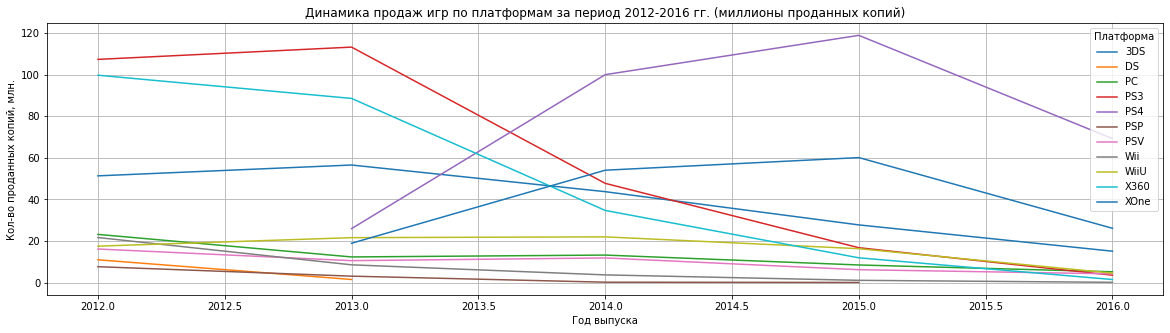

In [25]:
# новый датафрейм за выбранный актуальный период

actual_data = data.query('year_of_release >= 2012').copy()

# график с продажами игр
ax = (actual_data.pivot_table(    
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc=['sum']
).droplevel(0, axis=1)
.T.plot.line(grid=True, figsize=(20,5),
    title='Динамика продаж игр по платформам за период 2012-2016 гг. (миллионы проданных копий)',
    xlabel='Год выпуска',
    ylabel='Кол-во проданных копий, млн.'))
ax.legend(title='Платформа', loc='best')

plt.show()

Из представленных на графике 11 платформ, 10 платформ - версионные, поэтому для удобства анализа построим дополнительный график, предварительно сгруппировав разные версии одной платформы в одну. 

In [26]:
# добавим в датафрейм аггрегированное наименование платформы
# объединим 
# - PS3 и PS4 в PS,  
# - 3DS и DS в Nintendo DS,  
# - PSP и PSV в Portable PS,  
# - Wii и WiiU в Wii,  
# - X360 и XOne в Xbox

def agg_platform(row):
    try:
        if row['platform'] == 'PS3' or row['platform'] == 'PS4':
            return  'PS'
        if row['platform'] == '3DS' or row['platform'] == 'DS':
            return  'Nintendo DS'
        if row['platform'] == 'PSP' or row['platform'] == 'PSV':
            return  'Portable PS'
        if row['platform'] == 'Wii' or row['platform'] == 'WiiU':
            return  'Wii'
        if row['platform'] == 'X360' or row['platform'] == 'XOne':
            return  'Xbox'
        if row['platform'] == 'PC':
            return  'PC'
    except:
        return 'n'
    
actual_data['agg_platform'] = actual_data.apply(agg_platform, axis=1)

display(actual_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,agg_platform
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.049999,PS
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.270000,Xbox
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.630000,PS
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.599999,Nintendo DS
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.789999,PS


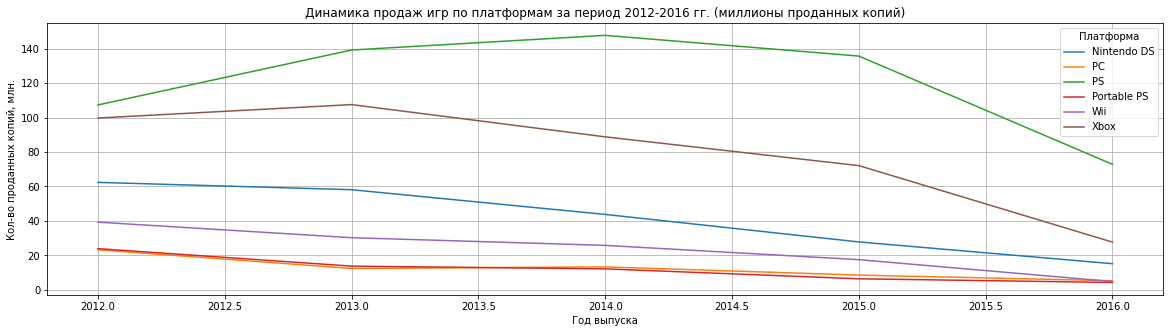

In [27]:
ax = (actual_data.pivot_table(    
    index='agg_platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc=['sum']
).droplevel(0, axis=1)
.T.plot.line(grid=True, figsize=(20,5),
    title='Динамика продаж игр по платформам за период 2012-2016 гг. (миллионы проданных копий)',
    xlabel='Год выпуска',
    ylabel='Кол-во проданных копий, млн.'))
ax.legend(title='Платформа', loc='best')

plt.show()

**Вывод**

Из данных графика видим, что абсолютным лидером продаж за весь выбранный период является PlayStation компании Sony. Следующая по объемам продаж - Xbox от Microsoft, далее идет DS от Nintendo, следом идет Wii, портативная PS и PC имеют примерно одинаковое количество проданных копий.

Также по данным детального графика выше видим, что продажи игр для новой версии платформы превышают продажи предыдущей версии в течение года после выхода новой версии.

В начале графика видим, что разрыв в количестве проданных копий между лидерами рынка PlayStation и Xbox был минимальным: 100 млн проданных копий у Xbox против 110 млн у PlayStation. В 2013 г. разница в количестве продаж увеличилась до 30 млн и дальше только росла, в 2015 г. продажи PlayStation превышали Xbox уже на 60 млн. проданных копий. В 2016 г. разница немного сократилась - 45 млн, но итоговый вывод делать рано, т.к. данные за этот год - неполные.

В целом по рынку наблюдаем снижение продаж с 2013 г. для всех платформ, кроме PlayStation, с 2014 г. снизились продажи для всех платформ, включая PlayStation.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
Опишите результат.

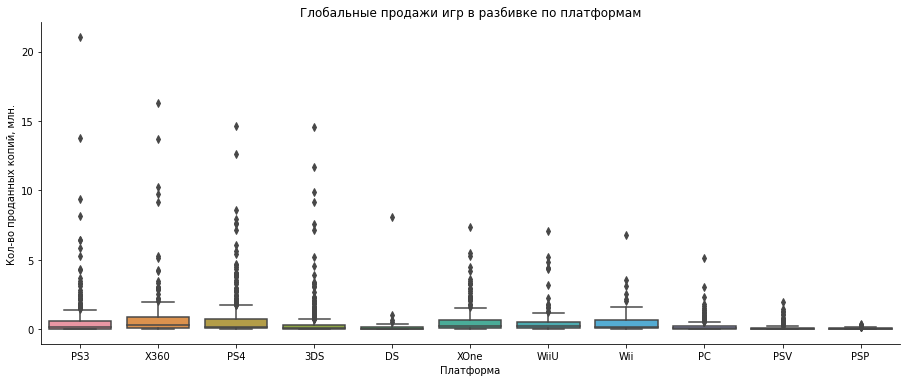

In [28]:
# диаграмма размаха
# ax = (actual_data.boxplot(column=['total_sales'], by='platform', grid= False , color='blue') )
# ax.set_xlabel('Платформа')
# ax.set_ylabel('Кол-во проданных копий, млн.')
# ax.set_title('Глобальные продажи игр в разбивке по платформам')
g = sns.catplot(
    data=actual_data, x='platform', y='total_sales',
    kind='box', height=5, aspect=2.5
)
g.set(xlabel='Платформа')
g.set(ylabel='Кол-во проданных копий, млн.')
g.set(title='Глобальные продажи игр в разбивке по платформам')

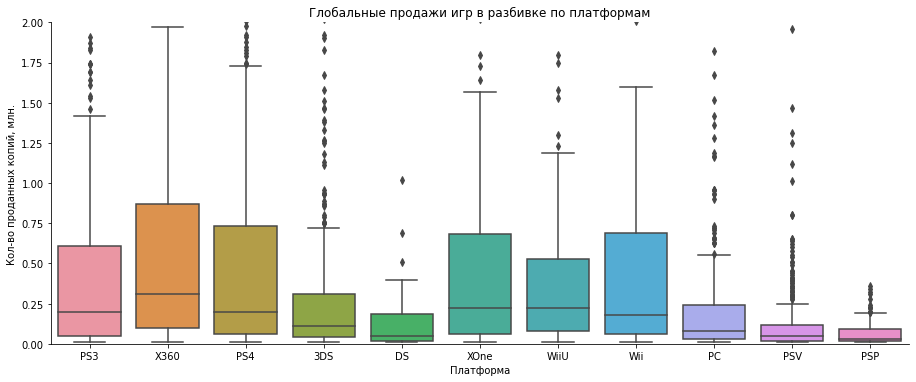

In [29]:
g = sns.catplot(
    data=actual_data, x='platform', y='total_sales',
    kind='box', height=5, aspect=2.5
)
g.set(ylim=(0, 2))
g.set(xlabel='Платформа')
g.set(ylabel='Кол-во проданных копий, млн.')
g.set(title='Глобальные продажи игр в разбивке по платформам')

In [30]:
# Отдельно посчитаем среднее, стандартное отклоненение и другие стат. характеристики продаж в разрезе платформ

# сводная таблица
ax = (actual_data.pivot_table(    
    index=actual_data.index,
    columns='platform',
    values='total_sales',
    aggfunc=['sum']
).droplevel(0, axis=1))

# проверка
display(ax.head())

display(actual_data.groupby('platform').agg(total_count=('total_sales', 'sum')))

display(ax['3DS'].sum())
display(ax['PS4'].sum())
display(ax['X360'].sum())

# вывод стат. характеристик
display(ax.describe())

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
16,NaN,NaN,NaN,21.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.27,NaN
31,NaN,NaN,NaN,NaN,14.63,NaN,NaN,NaN,NaN,NaN,NaN
33,14.599999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,13.789999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,total_count
platform,
3DS,194.610001
DS,12.550000
PC,62.650002
PS3,288.779999
PS4,314.140015
PSP,11.190000
PSV,49.180000
Wii,35.369999
WiiU,82.190002


194.61

314.13998

236.54

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,396.000000,31.000000,250.00000,492.000000,392.000000,173.000000,411.000000,54.000000,147.000000,292.000000,247.000000
mean,0.491439,0.404839,0.25060,0.586951,0.801378,0.064682,0.119659,0.655000,0.559116,0.810068,0.645020
std,1.387161,1.439245,0.49464,1.464113,1.609456,0.071296,0.203011,1.165447,1.058836,1.712069,1.036139
min,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.020000,0.03000,0.050000,0.060000,0.020000,0.020000,0.062500,0.080000,0.100000,0.060000
50%,0.110000,0.050000,0.08000,0.200000,0.200000,0.030000,0.050000,0.180000,0.220000,0.310000,0.220000
75%,0.312500,0.185000,0.24000,0.610000,0.730000,0.090000,0.120000,0.687500,0.525000,0.870000,0.685000
max,14.599999,8.060000,5.14000,21.049999,14.630000,0.360000,1.960000,6.760000,7.090000,16.270000,7.390000


**Вывод**

На первом графике «ящик с усами» видим много выбросов по всем платформам из выборки. 

Количество проданных копий игр внутри платформ распределены неравномерно: часть игр, у которых продажи намного превышают продажи большей части других игр платформы. Также большой разброс в продажах внутри платформ подтверждается большим значением стандартного отклонения, которое превышает медианное значение в несколько раз: у большинства платформ стандартное отклонение превышает 1 млн копий, в то время как медиана. т.е. срединное значение, распределяется от 50 до 310 тыс. копий для разных платформ. Это можно увидеть на втором графике и в таблице.

Можно сказать, что самой прибыльной платформой является X360, средние продажи составляют 310 тыс. копий, далее идут "WiiU" и "XOne", средние продажи - 220 тыс. штук, на третьем месте - "PS3" и "PS4" с медианными продажами 200 тыс. копий.
Стоит отметить, что несмотря на равные средние продажи, 50 % игр "XOne" превысили продажи 50 % игр "WiiU". То же самое можно сказать о паре "PS3" и "PS4": "PS4" продавались лучше "PS3".

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [31]:
# Проверим корреляцию для платформы "PS4"

display('Коэффициент Пирсона пользователи', (actual_data.query('platform == "PS4"')['total_sales']
    .corr(actual_data.query('platform == "PS4"')['user_score'])))
display('Коэффициент Пирсона критики', (actual_data.query('platform == "PS4"')['total_sales']
    .corr(actual_data.query('platform == "PS4"')['critic_score'])))

'Коэффициент Пирсона пользователи'

-0.031957105603966945

'Коэффициент Пирсона критики'

0.40656790102834933

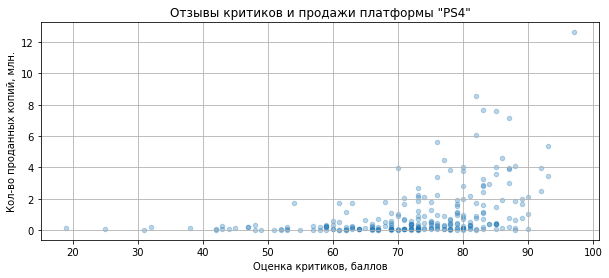

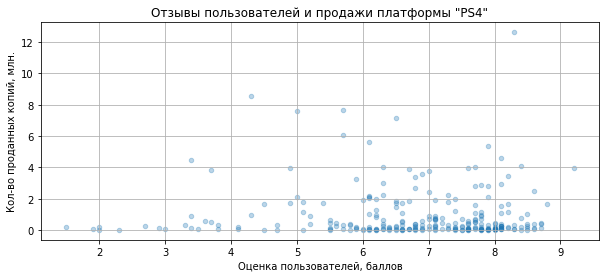

In [32]:
ax = (actual_data.query('platform == "PS4"')
      .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title='Отзывы критиков и продажи платформы "PS4"', 
                  rot=0, grid=True, figsize=(10, 4), xlabel='Оценка критиков, баллов', ylabel='Кол-во проданных копий, млн.'))

ax = (actual_data.query('platform == "PS4"')
      .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title='Отзывы пользователей и продажи платформы "PS4"', 
                  rot=0, grid=True, figsize=(10, 4), xlabel='Оценка пользователей, баллов', ylabel='Кол-во проданных копий, млн.'))

plt.show()

**Вывод**

Из диаграммы рассеяния и коэффициентов корреляции Пирсона видим, что объемы продаж не зависят от отзывов пользователей: игры с оценкой в 5-6 баллов и игры, оцененные на 7-8 баллов, продаются примерно одинаково. При этом видим, что диапазон оценок сосредотачивается от 5,5 до 8,2 баллов. Более высокие или низкие оценки встречаются реже. Также видим, что самая популярная игра платформы, которая была продана в количестве 13 млн копий, оценена пользователями около 8,2 баллов, в то время как вторая по продажам игра с чуть более 8 млн проданных копий, имеет рейтинг почти в 2 раза ниже: около 4,2 баллов.

Между продажами и отзывами критиков наблюдается слабая корреляция, коэффициент корреляции  - 40 %: игры с самыми высокими продажами имеют и высокий рейтинг, от 70 баллов и выше. Видим, что у игр, оцененных ниже 70 баллов, продажи не превышают 2 млн копий. Однако только высокий рейтинг критиков не дает гарантии больших продаж.

#### Соотнесите выводы с продажами игр на других платформах.

In [33]:
# Проверим корреляцию для остальных платформ

list_corr_user = []
list_corr_critic = []
list_platform = []

for n in actual_data.query('platform ! = "PS4"')['platform'].value_counts(ascending=False).head().index:
    
    a = (actual_data.loc[(actual_data['platform'] == n), 'total_sales']
    .corr(actual_data.loc[(actual_data['platform'] == n), 'user_score']))
    
    b = (actual_data.loc[(actual_data['platform'] == n), 'total_sales']
    .corr(actual_data.loc[(actual_data['platform'] == n), 'critic_score']))

    list_corr_user.append(a)
    list_corr_critic.append(b)
    list_platform.append(n)
    
df = pd.DataFrame({'Пользователи': list_corr_user, 'Критики': list_corr_critic}, index=list_platform)
print('Кэффициенты корреляции продаж с отзывами пользователей и критиков')
df

Кэффициенты корреляции продаж с отзывами пользователей и критиков


,Пользователи,Критики
PS3,-0.006206,0.334152
PSV,-0.004339,0.094488
3DS,0.197583,0.320803
X360,0.006164,0.360573
PC,-0.121867,0.237243


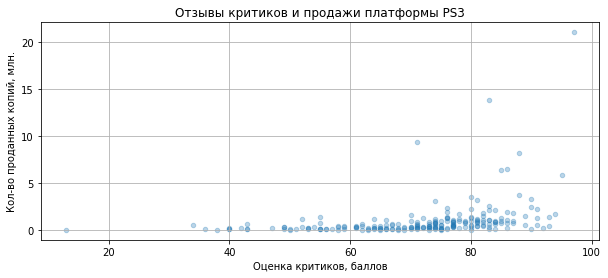

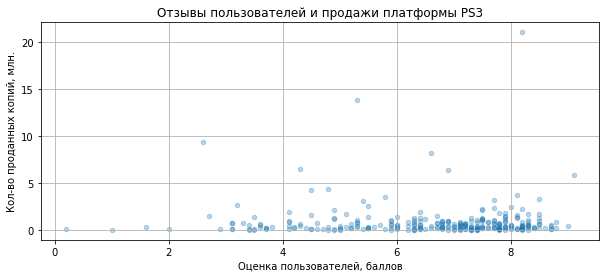

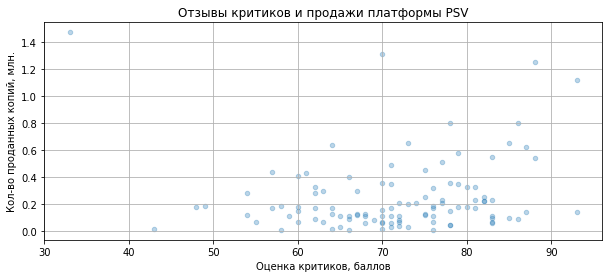

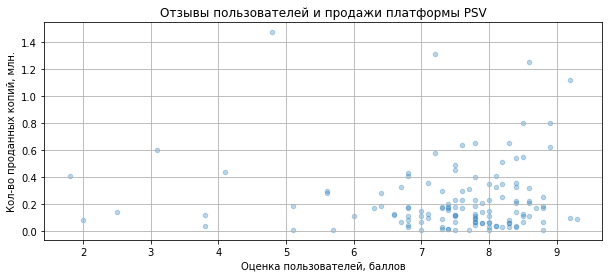

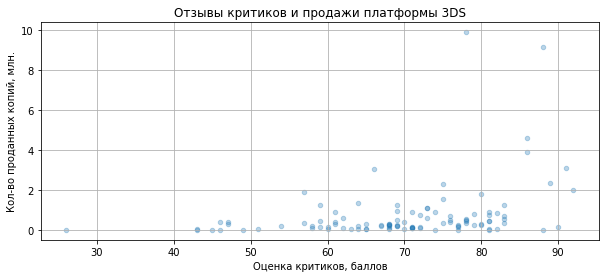

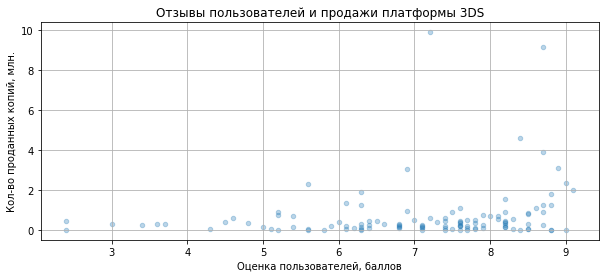

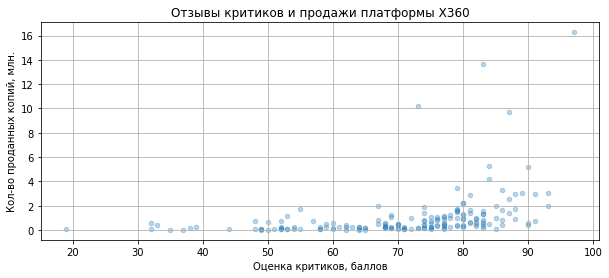

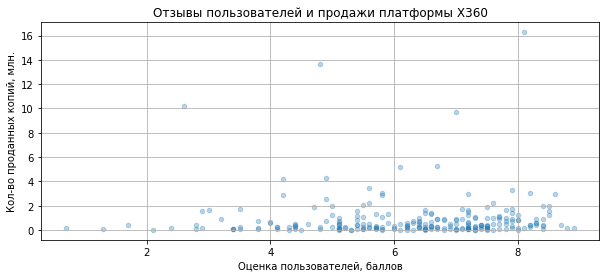

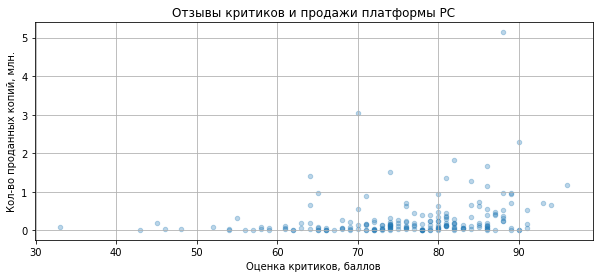

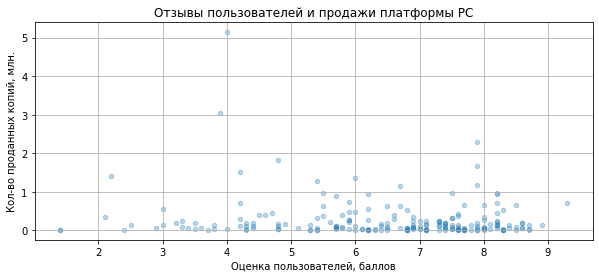

In [34]:
for n in actual_data.query('platform ! = "PS4"')['platform'].value_counts(ascending=False).head().index:
    
    ax = (actual_data.loc[(actual_data['platform'] == n), ['critic_score', 'total_sales']]
      .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title=f'Отзывы критиков и продажи платформы {n}', 
                  rot=0, grid=True, figsize=(10, 4), xlabel='Оценка критиков, баллов', ylabel='Кол-во проданных копий, млн.'))

    ax = (actual_data.loc[(actual_data['platform'] == n), ['user_score', 'total_sales']]
      .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title=f'Отзывы пользователей и продажи платформы {n}', 
                  rot=0, grid=True, figsize=(10, 4), xlabel='Оценка пользователей, баллов', ylabel='Кол-во проданных копий, млн.'))

    
plt.show()

**Вывод**

Построив диаграммы рассеяния и посчитав коэффициенты корреляции Пирсона по пяти другим популярным плаформам платформам видим, что здесь также продажи не зависят от оценки пользователей. Лидеры продаж могут иметь как очень высокую оценку, так и очень низкую. Единственная из представленных на графиках платформ, где нет высоких продаж у игр с оценкой ниже 5 баллов - платформа "3DS".
Также можно сказать, что диапазон популярной оценки от 7 до 8, так, на диаграммах в этом промежутке видим наибольшее количество "точек", окрашенных темно-синим цветом.

Для других платформ корреляция между продажами и отзывами критиков слабее по сравнению с "PS4". Для "PS3", "3DS" и "X360" коэффициент Пирсона варьируется от 32 до 36 %, у PC - 24%, самый низкий коэффициент у PSV - всего 9 %, что практически означает, что продажи не зависят от оценки критиков. Однако возможно, что на расчет в данном случае повлияла игра с высокими продажами и оценкой чуть выше 30 баллов.

#### Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

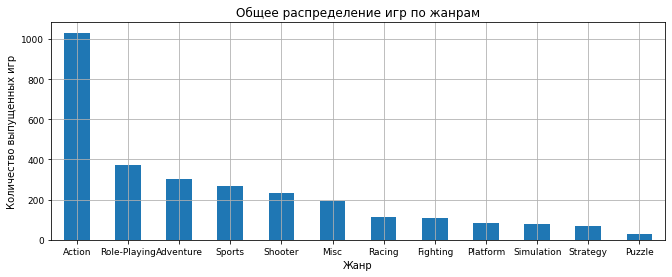

In [35]:
# график выпуска по жанрам 
ax = (actual_data
        .groupby('genre').agg(sales=('genre', 'count')).reset_index()
        .sort_values(by='sales', ascending = False)
        .plot.bar(x='genre', y='sales', title='Общее распределение игр по жанрам', 
                  rot=0, grid=True, figsize=(11, 4), fontsize=9, xlabel='Жанр', ylabel='Количество выпущенных игр', legend=False))

plt.show()

In [36]:
# график продаж по жанрам

# средние продажи по жанрам
(actual_data
.groupby('genre').agg(sales=('total_sales', 'median')).reset_index()
.sort_values(by='sales', ascending = False))

,genre,sales
8,Shooter,0.440
10,Sports,0.240
4,Platform,0.210
6,Racing,0.140
7,Role-Playing,0.140
2,Fighting,0.130
0,Action,0.120
3,Misc,0.120
9,Simulation,0.120
11,Strategy,0.080


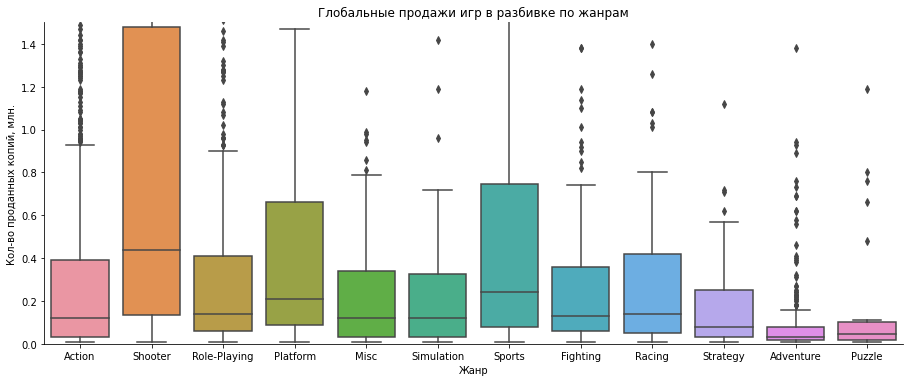

In [37]:
g = sns.catplot(
    data=actual_data, x='genre', y='total_sales',
    kind='box', height=5, aspect=2.5
)
g.set(ylim=(0, 1.5))
g.set(xlabel='Жанр')
g.set(ylabel='Кол-во проданных копий, млн.')
g.set(title='Глобальные продажи игр в разбивке по жанрам')

**Вывод**

Самый прибыльный жанр - "Shooter", средние продажи составляют 440 тыс. копий, в то время как по количеству выпускаемых игр он находится лишь на пятом месте. Кроме того, у данного жанра высоко стартует первый квартиль и большой размах до третьего квартиля, что означает - около 50 % всех выпущенных игр продаются довольно хорошо по сравнению с другими жанрами. 

Также в тройку прибыльных жанров входят "Sports" (четвертый по кол-ву  игр), медианные продажи - 240 тыс. копий и "Platform" (девятый по кол-ву  игр), медианные продажи - 210 тыс. копий.


Средние продажи абсолютного лидера по числу выпущенных игр жанра "Action" составляют 120 тыс. копий, что является средним результатом по сравнению с другими жанрами.

В число жанров с низкими продажами входят "Strategy", "Puzzle", "Adventute", среднее значение проданных копий - 80, 45 и 35 тыс. соответственно.

**Промежуточные выводы**

Проведен анализ выпуска игр в разные годы. 
Для более детального исследования был выбран актуальный период: с 2012 по 2016 гг. включительно.

За выбранный период лидирует по продажам PlayStation компании Sony. Следующая по объемам продаж - Xbox от Microsoft, далее идет DS от Nintendo, следом идет Wii, портативные PS и PC имеют примерно одинаковое количество проданных копий.

В целом по рынку наблюдаем снижение продаж с 2014 г. для всех платформ.

Самой прибыльной платформой является X360, средние продажи составляют 310 тыс. копий, далее идут "WiiU" и "XOne", средние продажи - 220 тыс. штук, на третьем месте - "PS3" и "PS4" с медианными продажами 200 тыс. копий.

Объемы продаж не зависят от отзывов пользователей. 
Между продажами и отзывами критиков наблюдается слабая корреляция

Самый прибыльный жанр - "Shooter", средние продажи составляют 440 тыс. копий. 

Также в тройку прибыльных жанров входят "Sports", медианные продажи - 240 тыс. копий и "Platform", медианные продажи - 210 тыс. копий.

Средние продажи лидера по числу выпущенных игр жанра "Action" составляют 120 тыс. копий, что является средним результатом по сравнению с другими жанрами.

В число жанров с низкими продажами входят "Strategy", "Puzzle", "Adventute", среднее значение проданных копий - 80, 45 и 35 тыс. соответственно.

### .   Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [38]:
# для разделения топ-5 и другие
top_platform_na = (actual_data
      .groupby('platform').agg(sales=('na_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .head().index)

top_platform_eu = (actual_data
      .groupby('platform').agg(sales=('eu_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .head().index)

top_platform_jp = (actual_data
      .groupby('platform').agg(sales=('jp_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .head().index)

top_platform = top_platform_na
def platform_new(row):
    
    if row['platform'] in  top_platform :
        return  row['platform']
    else :
        return'other'
        
actual_data['platform_new_na'] = actual_data.apply(platform_new, axis=1)

top_platform = top_platform_eu
actual_data['platform_new_eu'] = actual_data.apply(platform_new, axis=1)

top_platform = top_platform_jp
actual_data['platform_new_jp'] = actual_data.apply(platform_new, axis=1)

# проверка, что группа присвоилась корректно
display(actual_data.groupby(['platform', 'platform_new_na']).agg(sales=('na_sales', 'sum')).sort_values(by='sales', ascending=False))
display(actual_data.groupby(['platform', 'platform_new_eu']).agg(sales=('eu_sales', 'sum')).sort_values(by='sales', ascending=False))
display(actual_data.groupby(['platform', 'platform_new_jp']).agg(sales=('jp_sales', 'sum')).sort_values(by='sales', ascending=False))

,,sales
platform,platform_new_na,
X360,X360,140.050003
PS4,PS4,108.739998
PS3,PS3,103.379997
XOne,XOne,93.120003
3DS,3DS,55.310001
WiiU,other,38.099998
PC,other,19.120001
Wii,other,17.450001
PSV,other,10.980000


,,sales
platform,platform_new_eu,
PS4,PS4,141.089996
PS3,PS3,106.849998
X360,X360,74.519997
XOne,XOne,51.590000
3DS,3DS,42.639999
PC,other,37.759998
WiiU,other,25.129999
Wii,other,11.920000
PSV,other,11.360000


,,sales
platform,platform_new_jp,
3DS,3DS,87.790001
PS3,PS3,35.290001
PSV,PSV,21.039999
PS4,PS4,15.960000
WiiU,WiiU,13.010000
PSP,other,10.470000
DS,other,3.720000
Wii,other,3.390000
X360,other,1.570000


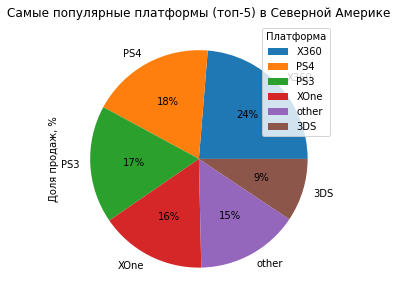

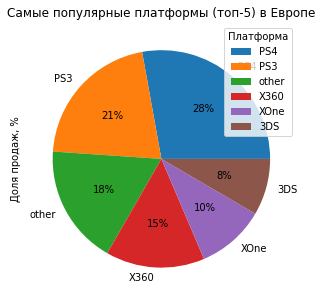

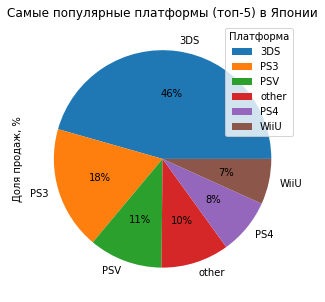

In [39]:
# график популярные платформы
ax = (actual_data
      .groupby('platform_new_na').agg(sales=('na_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .plot.pie(y='sales', title='Самые популярные платформы (топ-5) в Северной Америке',
                autopct='%1.0f%%', figsize=(5, 5)))
ax.legend(title='Платформа', loc='best')
ax.set_ylabel('Доля продаж, %')

ax = (actual_data
      .groupby('platform_new_eu').agg(sales=('eu_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .plot.pie(y='sales', title='Самые популярные платформы (топ-5) в Европе',
                autopct='%1.0f%%', figsize=(5, 5)))
ax.legend(title='Платформа', loc='best')
ax.set_ylabel('Доля продаж, %')

ax = (actual_data
      .groupby('platform_new_jp').agg(sales=('jp_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .plot.pie(y='sales', title='Самые популярные платформы (топ-5) в Японии',
                autopct='%1.0f%%', figsize=(5, 5)))
ax.legend(title='Платформа', loc='best')
ax.set_ylabel('Доля продаж, %')

plt.show()

In [40]:
# для разделения топ-5 и другие
top_genre_na = (actual_data
      .groupby('genre').agg(sales=('na_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .head().index)

top_genre_eu = (actual_data
      .groupby('genre').agg(sales=('eu_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .head().index)

top_genre_jp = (actual_data
      .groupby('genre').agg(sales=('jp_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .head().index)

top_genre = top_genre_na
def genre_new(row):
    
    if row['genre'] in  top_genre :
        return  row['genre']
    else :
        return'other'
        
actual_data['genre_new_na'] = actual_data.apply(genre_new, axis=1)

top_genre = top_genre_eu
actual_data['genre_new_eu'] = actual_data.apply(genre_new, axis=1)

top_genre = top_genre_jp
actual_data['genre_new_jp'] = actual_data.apply(genre_new, axis=1)

# проверка, что группа присвоилась корректно
display(actual_data.groupby(['genre', 'genre_new_na']).agg(sales=('na_sales', 'sum')).sort_values(by='sales', ascending=False))
display(actual_data.groupby(['genre', 'genre_new_eu']).agg(sales=('eu_sales', 'sum')).sort_values(by='sales', ascending=False))
display(actual_data.groupby(['genre', 'genre_new_jp']).agg(sales=('jp_sales', 'sum')).sort_values(by='sales', ascending=False))

,,sales
genre,genre_new_na,
Action,Action,177.839996
Shooter,Shooter,144.770004
Sports,Sports,81.529999
Role-Playing,Role-Playing,64.000000
Misc,Misc,38.189999
Platform,other,25.379999
Fighting,other,19.789999
Racing,other,17.219999
Adventure,other,8.920000


,,sales
genre,genre_new_eu,
Action,Action,159.339996
Shooter,Shooter,113.470001
Sports,Sports,69.080002
Role-Playing,Role-Playing,48.529999
Racing,Racing,27.290001
Misc,other,26.320000
Platform,other,21.410000
Simulation,other,14.550000
Fighting,other,10.790000


,,sales
genre,genre_new_jp,
Role-Playing,Role-Playing,65.440002
Action,Action,52.799999
Misc,Misc,12.860000
Simulation,Simulation,10.410000
Fighting,Fighting,9.440000
Shooter,other,9.230000
Platform,other,8.630000
Adventure,other,8.240000
Sports,other,8.010000


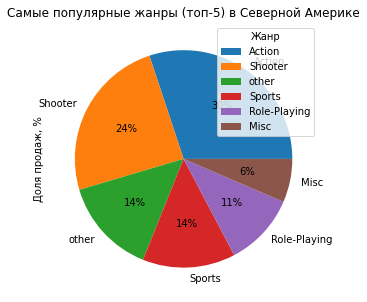

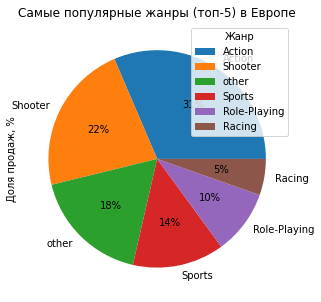

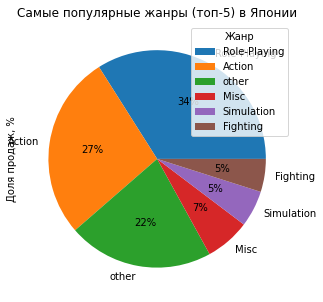

In [41]:
# график популярные жанры
ax = (actual_data
      .groupby('genre_new_na').agg(sales=('na_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .plot.pie(y='sales', title='Самые популярные жанры (топ-5) в Северной Америке',
                autopct='%1.0f%%', figsize=(5, 5)))
ax.legend(title='Жанр', loc='best')
ax.set_ylabel('Доля продаж, %')

ax = (actual_data
      .groupby('genre_new_eu').agg(sales=('eu_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .plot.pie(y='sales', title='Самые популярные жанры (топ-5) в Европе',
                autopct='%1.0f%%', figsize=(5, 5)))
ax.legend(title='Жанр', loc='best')
ax.set_ylabel('Доля продаж, %')

ax = (actual_data
      .groupby('genre_new_jp').agg(sales=('jp_sales', 'sum'))
      .sort_values(by='sales', ascending=False)
      .plot.pie(y='sales', title='Самые популярные жанры (топ-5) в Японии',
                autopct='%1.0f%%', figsize=(5, 5)))
ax.legend(title='Жанр', loc='best')
ax.set_ylabel('Доля продаж, %')

plt.show()

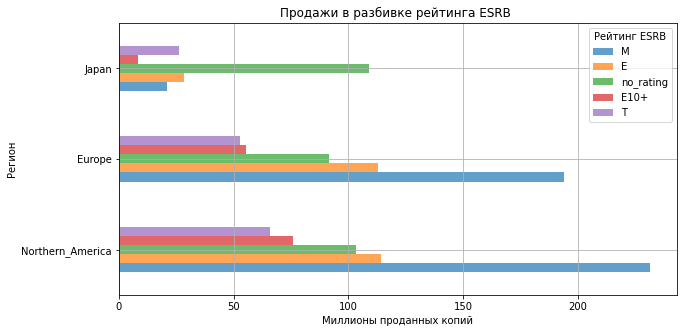

rating,M,E,no_rating,E10+,T
Northern_America,231.569992,114.370003,103.309998,75.699997,66.019997
Europe,193.960007,113.019997,91.500000,55.369999,52.959999
Japan,21.200001,28.330000,108.839996,8.190000,26.020000


In [42]:
# график продажи по рейтингам
ax = (actual_data
      .groupby('rating').agg(Northern_America=('na_sales', 'sum'), Europe=('eu_sales', 'sum'), Japan=('jp_sales', 'sum'))
      .sort_values(by='Northern_America', ascending=False)
      .T
      .plot.barh(alpha=0.7, figsize=(10, 5), title='Продажи в разбивке рейтинга ESRB ', grid=True))
ax.legend(title='Рейтинг ESRB', loc='best')
ax.set_ylabel('Регион')
ax.set_xlabel('Миллионы проданных копий')

plt.show()

(actual_data
.groupby('rating').agg(Northern_America=('na_sales', 'sum'), Europe=('eu_sales', 'sum'), Japan=('jp_sales', 'sum'))
.sort_values(by='Northern_America', ascending=False)
.T)

# Из информации о рейтингах видим, что некоторые рейтинги можно добавить в более крупные группы: объединим K-A с E, EC с E.
actual_data.loc[(data['rating'] == 'K-A'), 'rating'] = 'E'
actual_data.loc[(data['rating'] == 'EC'), 'rating'] = 'E'

# проверка
(actual_data
.groupby('rating').agg(Northern_America=('na_sales', 'sum'), Europe=('eu_sales', 'sum'), Japan=('jp_sales', 'sum'))
.sort_values(by='Northern_America', ascending=False)
.T)

**Вывод**

- Топ платформ 

В Северной Америке самой популярной платформой по числу проданных копий является "X360" с долей рынка 24 %. 
Далее идут "PS4", "PS3" и "XOne"  с долями по 18, 17 и 16 % соответственно.
Замыкает пятерку лидеров 3DS c долей 9 %. На другие платформы приходится 15 % рынка.

В Европе состав топ-5 совпадает с американским, но при этом доли распределяются по-другому.
Здесь самой популярной платформой является "PS4" с долей 28 %. 
Далее идут "PS3", "X360" и "XOne"  с долями по 21, 15 и 10 % соответственно.
Замыкает пятерку лидеров также как и в Северной Америке "3DS" c долей 8 %. На другие платформы приходится 18 % рынка.

В Японии лидером продаж является "3DS", которая занимает почти половину рынка с долей 46 %. 
Далее идут "PS3", "PSV" и "PS4"  с долями по 18, 11 и 8 % соответственно.
Замыкает пятерку лидеров платформа "WiiU" c долей 7 %. На другие платформы приходится 10 % рынка.

Делаем вывод, что в Японии пользователи предпочитают портативные консоли, топ-5 продаж включает их три.
В Европе и Северной Америке пользователи выбирают как PlayStation, так и XBox, однако в  Северной Америке все же более популярна XBox, в то время как в Европе - PlayStation.

- Топ жанров

Состав топ-5 жанров Северной Америки: "Action", "Shooter", "Sports", "Role-Playing", "Misc".
В Европе доли внутри топ-5 распределяются похожим образом, кроме пятой строки, здесь это игры жанра "Racing".

В Японии топ-5 отличается: здесь рейтинг возглавляют игры жанра "Role-Playing".
В топ также входят жанры "Action" и "Misc", однако отсутствуют популярные в Северной Америке и Европе жанры "Shooter" и "Sports". Вместо них в топ-5 входят игры жанра "Simulation" и "Fighting".

- Рейтинг ESRB

Из информации о рейтингах видим, что некоторые рейтинги можно добавить в более крупные группы: объединим "K-A" с "E", "EC" с "E".

Также видим, что в Японии отсутсвует рейтинг больше, чем у половины игр, в Европе и Северной Америке также сущственная доля игр не имеет рейтинга ESRB.

В Европе и Северной Америке продажи внутри рейтинга распределены похожим образом: лидирует игры с рейтингом "M" - «Для взрослых», далее идут игры "Е" - «Для всех», следом - игры без рейтинга, "E10+" - «Для всех от 10 лет и старше», замыкает список "T" -  «Подросткам». 
В то время как в Японии во главе - игры без рейтинга, далее с небольшим отрывом игры "Е" - «Для всех», далее "T" -  «Подросткам», "M" - «Для взрослых», замыкает список "E10+" - «Для всех от 10 лет и старше».

Очевидно, что в Европе и Северной Америке лидеры продаж - игры с рейтингом "M", однако в остальном нельзя точно утверждать, как именно бы распределились продажи внутри рейтингов, т.к. большое количество игр не имеют назначенного рейтинга, особенно это затрагивает японский рынок - здесь больше половины игр не имеют рейтинга.

**Расшифровка рейтинга из интернета**

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. С 1 марта 2018 года этот рейтинг больше не используется и заменяется на Everyone по причине того, что этот рейтинг имели менее 300 игр.


«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):


«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.


«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.


«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.


«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

### .   Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Необходимо проверить, являются ли в среднем оценки пользователей одинаковыми для плаформ "Xbox One" и "PC". 

- Даны две независимые выборки: оценки пользователей для игр платформы "Xbox One" и "PC". 


- Таким образом, сравниваем две генеральные совокупности и формулируем нулевую и альтернативные гипотезы:


* Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные.


- Выбираем уровень статистической значимости - 1%.
- Строим распределение выборочного среднего с помощью двухвыборочного t-теста для независимых выборок методом из библиотеки scipy ttest_ind.
- Cравниваем полученное p-value и выбранный уровень статистической значимости. 
Если p-value меньше alpha, можно сделать вывод, что наблюдаемое значение слишком далеко отпредполагаемого в нулевой гипотезе, и отвергнуть её.

In [44]:
alpha = 0.01 # задаем уровень стат. значимости

# Пользовательский рейтинг Xbox One 
#actual_data.query('platform == "XOne"')['user_score']

# Пользовательский рейтинг PC 
#actual_data.query('platform == "PC"')['user_score']

results = st.ttest_ind(actual_data.dropna(subset=['user_score']).query('platform == "XOne"')['user_score'], actual_data.dropna(subset=['user_score']).query('platform == "PC"')['user_score'])

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')    
    
# проверка среднего 
display(actual_data.query('platform == "XOne"')['user_score'].mean())
display(actual_data.query('platform == "PC"')['user_score'].mean())

p-value: 0.5535102819461235
Нет оснований отвергнуть нулевую гипотезу


6.5214286

6.428641

**Вывод**  

Полученное значение p_value показывает, что нулевая гипотеза не может быть отвергнута в пользу альтернативной о том, что средние пользовательские рейтинги платформ "Xbox One" и "PC" различаются.
Таким образом, рейтинги двух платформ в большинстве случаев будут совпадать. 

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Необходимо проверить, являются ли в среднем оценки пользователей одинаковыми для жанров "Action" и "Sports" разными. 

- Даны две независимые выборки: оценки пользователей для жанров "Action" и "Sports". 


- Таким образом, сравниваем две генеральные совокупности и формулируем нулевую и альтернативные гипотезы:


* Н0: Средние пользовательские рейтинги жанров "Action" и "Sports" одинаковые.

* Н1: Средние пользовательские рейтинги жанров "Action" и "Sports" разные.


- Выбираем уровень статистической значимости - 1%.
- Строим распределение выборочного среднего с помощью двухвыборочного t-теста для независимых выборок методом из библиотеки scipy ttest_ind.
- Cравниваем полученное p-value и выбранный уровень статистической значимости. 
Если p-value меньше alpha, можно сделать вывод, что наблюдаемое значение слишком далеко отпредполагаемого в нулевой гипотезе, и отвергнуть её в пользу альтернативной.

In [46]:
alpha = 0.01 # задаем уровень стат. значимости

# Пользовательский рейтинг Action
#actual_data.query('genre == "Action"')['user_score']

# Пользовательский рейтинг Sports 
#actual_data.query('genre == "Sports"')['user_score']

results = st.ttest_ind(actual_data.dropna(subset=['user_score']).query('genre == "Action"')['user_score'], actual_data.dropna(subset=['user_score']).query('genre == "Sports"')['user_score'])

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')    
    
# проверка среднего 
display(data.query('genre == "Action"')['user_score'].mean())
display(data.query('genre == "Sports"')['user_score'].mean())

p-value: 4.8042137724010745e-26
Отвергаем нулевую гипотезу


7.0581293

6.952778

**Вывод**  

Полученное значение p_value стремится к нулю и значительно ниже заданного уровня статистической значимости. 
Отвергаем нулевую гипотезу в пользу альтернативной и делаем вывод о том, что с большой вероятностью средние пользовательские рейтинги жанров Action и Sports разные.

### .   **Общий вывод**  

**Описание данных**

Исходный датасет записан в переменную `data`. Первичное знакомство с данными показало следующее:

Датафрейм содержит 11 столбцов и 16715 строк. 
Пять столбцов с информацией о названии, платформе, жанре, оценке пользователей и рейтинге игры имеют строковый тип данных. 
Остальные столбцы, описывающие год выпуска, продажи в Северной Америке, продажи в Европе, продажи в Японии, продажи в других странах и оценку критиков имеют вещественный тип данных.

Также видим, что датасет содержит пропуски.




**Предобработка данных: очистка аномалий, пропусков и дубликатов**

Преобразованы названия столбцов в нижний регистр.

Тип данных столбца user_score изменен из строкового в вещественный по аналогии со столбцом critic_score,
предварительно было решено аббревиатуру 'tbd' ('to be determined') в столбце с оценкой пользователей считать, что оценка отсутствует,  и заменить значения 'tbd' на пропуски.

Также был создан новый столбец "total_sales" с суммарными продажами во всех регионах.

Обнаружены и удалены два дубликата по связке имя-платформа-год выпуска.

Найдены и удалены строки с пропущенными значениями в столбцах "name", "genre" и "year_of_release" (около 1,6 % строк от объема датафрейма).

Пропуски в колонке с рейтингом игр заменены на значение 'no_rating' для того, чтобы в анализе не исключать игры, у которых нет рейтинга.

Пропуски в столбцах с оценкой критиков и пользователей было решено не обрабатывать.

Причины, которые могли привести к пропускам в данных: 
- до 2000 года рынок игр был развит недостаточно, оценки и рейтинг не выставлялись.
- пропуски позже 2000 года можно объяснить тем, что возможно на некоторых платформах и для видов игр оценки и рейтинги не выставляются.
- возможно техническая причина пропусков, такая как: система не смогла распознать символы в определенных ячейках или заполнить в нужном формате данные при сборке датасета.



Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Исследовательский анализ данных**

**Выпуск игр в разные годы**

Анализ данных о продажах игр за период с 1980 по 2016 гг. показал:

- Стремительный рост рынка игр происходил с 2000 года и продолжался до 2008-2009 гг. Далее наступил кризис, продолжавшийся до 2012 г., начиная с которого произошла стабилизация рынка, без резких скачков и падений.

- До 2000 года выпускалось небольшое количество игр по сравнению с более поздними периодами: не более 50 штук, за исключением игр жанра "Action", в этом жанре выпускалось по 60-70 игр до 2000 года. 

- Далее наблюдаем плавный рост в общем количестве выпусков игр, за некоторыми исключениями, до ориентировочно 2008-2009 гг.
После наблюдаем падение рынка до 2012 г.
После 2012 г. в целом видим выпрямление в количестве выпусков игр, без резких скачков и падений.

- Становление рынка игр пришлось на период с 2001 года.

**Динамика продаж по платформам**

За представленный в датасете период с 1985 по 2016 гг. появились и исчезли шесть платформ: PS и DS существовали 9 лет, GBA и GC - 6 лет, PS2 - 11 лет, XB - 8 лет. 

Таким образом, средний срок существования платформ без учета PC - 8,5 лет.

Примерно с 2013 года наблюдается снижение в количестве выпущенных игр на всех платформах кроме персональных компьютеров.

**Выбор актуального периода для прогноза на 2017 год**

Т.к. рынок компьютерных игр стремительно менятеся, было решено не рассматривать длинные отрезки времени и в качестве актуального периода взять период с 2012 по 2016 гг. включительно по следующим причинам:
- стабилизация рынка к 2012 г., после которого до 2016 г. не было резких взлетов или падений в количестве выпускаемых игр как в целом, так и в разрезе жанров/платформ;
- ранее 2008 г. прекратили свое существование сразу несколько крупных платформ;
- т.к. мы выяснили, что средний срок жизни платформы - 8,5 лет, а последние данные в датафрейме за неполный 2016 г., то для анализа нужны платформы, которые находятся по крайней мере в середине своего существования, т.е. 4,5 года.


**Выбор несколько потенциально прибыльных платформ**

Абсолютным лидером продаж за весь выбранный период является PlayStation компании Sony. Следующая по объемам продаж - Xbox от Microsoft, далее идет DS от Nintendo, следом идет Wii, портативная PS и PC имеют примерно одинаковое количество проданных копий.

Продажи игр для новой версии платформы превышают продажи предыдущей версии в течение года после выхода новой версии.

Разрыв в количестве проданных копий между лидерами рынка PlayStation и Xbox был минимальным: 100 млн проданных копий у Xbox против 110 млн у PlayStation. В 2013 г. разница в количестве продаж увеличилась до 30 млн и дальше только росла, в 2015 г. продажи PlayStation превышали Xbox уже на 60 млн. проданных копий. В 2016 г. разница немного сократилась - 45 млн, но итоговый вывод делать рано, т.к. данные за этот год - неполные.

В целом по рынку наблюдаем снижение продаж с 2013 г. для всех платформ, кроме PlayStation, с 2014 г. снизились продажи для всех платформ, включая PlayStation.

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам**

На графике видим много выбросов по всем платформам из выборки. 

Количество проданных копий игр внутри платформ распределены неравномерно: часть игр, у которых продажи намного превышают продажи большей части других игр платформы. Также большой разброс в продажах внутри платформ подтверждается большим значением стандартного отклонения, которое превышает медианное значение в несколько раз: у большинства платформ стандартное отклонение превышает 1 млн копий, в то время как медиана. т.е. срединное значение, распределяется от 50 до 310 тыс. копий для разных платформ. Это можно увидеть на втором графике и в таблице.

Можно сказать, что самой прибыльной платформой является X360, средние продажи составляют 310 тыс. копий, далее идут "WiiU" и "XOne", средние продажи - 220 тыс. штук, на третьем месте - "PS3" и "PS4" с медианными продажами 200 тыс. копий.
Стоит отметить, что несмотря на равные средние продажи, 50 % игр "XOne" превысили продажи 50 % игр "WiiU". То же самое можно сказать о паре "PS3" и "PS4": "PS4" продавались лучше "PS3".


**Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков**

Диаграммы рассеяния и коэффициенты корреляции Пирсона показали, что объемы продаж не зависят от отзывов пользователей: игры с оценкой в 5-6 баллов и игры, оцененные на 7-8 баллов, продаются примерно одинаково. При этом видим, что диапазон оценок сосредотачивается от 5,5 до 8,2 баллов. Более высокие или низкие оценки встречаются реже. Также видим, что самая популярная игра платформы, которая была продана в количестве 13 млн копий, оценена пользователями около 8,2 баллов, в то время как вторая по продажам игра с чуть более 8 млн проданных копий, имеет рейтинг почти в 2 раза ниже: около 4,2 баллов.

Между продажами и отзывами критиков наблюдается слабая корреляция, коэффициент корреляции  - 40 %: игры с самыми высокими продажами имеют и высокий рейтинг, от 70 баллов и выше. Видим, что у игр, оцененных ниже 70 баллов, продажи не превышают 2 млн копий. Однако только высокий рейтинг критиков не дает гарантии больших продаж.

**Влияние на продажи внутри других платформ отзывов пользователей и критиков**

Здесь также продажи не зависят от оценки пользователей. Лидеры продаж могут иметь как очень высокую оценку, так и очень низкую. Единственная из представленных на графиках платформ, где нет высоких продаж у игр с оценкой ниже 5 баллов - платформа "3DS".
Также можно сказать, что диапазон популярной оценки от 7 до 8, так, на диаграммах в этом промежутке видим наибольшее количество "точек", окрашенных темно-синим цветом.

Для других платформ корреляция между продажами и отзывами критиков слабее по сравнению с "PS4". Для "PS3", "3DS" и "X360" коэффициент Пирсона варьируется от 32 до 36 %, у PC - 24%, самый низкий коэффициент у PSV - всего 9 %, что практически означает, что продажи не зависят от оценки критиков. Однако возможно, что на расчет в данном случае повлияла игра с высокими продажами и оценкой чуть выше 30 баллов.


**Выделение жанров с высокими и низкими продажами**

Самый прибыльный жанр - "Shooter", средние продажи составляют 440 тыс. копий, в то время как по количеству выпускаемых игр он находится лишь на пятом месте. Кроме того, у данного жанра высоко стартует первый квартиль и большой размах до третьего квартиля, что означает - около 50 % всех выпущенных игр продаются довольно хорошо по сравнению с другими жанрами. 

Также в тройку прибыльных жанров входят "Sports" (четвертый по кол-ву  игр), медианные продажи - 240 тыс. копий и "Platform" (девятый по кол-ву  игр), медианные продажи - 210 тыс. копий.

Средние продажи абсолютного лидера по числу выпущенных игр жанра "Action" составляют 120 тыс. копий, что является средним результатом по сравнению с другими жанрами.

В число жанров с низкими продажами входят "Strategy", "Puzzle", "Adventute", среднее значение проданных копий - 80, 45 и 35 тыс. соответственно.



**Портрет пользователя каждого региона**

- Топ платформ 

В Северной Америке самой популярной платформой по числу проданных копий является "X360" с долей рынка 24 %. 
Далее идут "PS4", "PS3" и "XOne"  с долями по 18, 17 и 16 % соответственно.
Замыкает пятерку лидеров 3DS c долей 9 %. На другие платформы приходится 15 % рынка.

В Европе состав топ-5 совпадает с американским, но при этом доли распределяются по-другому.
Здесь самой популярной платформой является "PS4" с долей 28 %. 
Далее идут "PS3", "X360" и "XOne"  с долями по 21, 15 и 10 % соответственно.
Замыкает пятерку лидеров также как и в Северной Америке "3DS" c долей 8 %. На другие платформы приходится 18 % рынка.

В Японии лидером продаж является "3DS", которая занимает почти половину рынка с долей 46 %. 
Далее идут "PS3", "PSV" и "PS4"  с долями по 18, 11 и 8 % соответственно.
Замыкает пятерку лидеров платформа "WiiU" c долей 7 %. На другие платформы приходится 10 % рынка.

Делаем вывод, что в Японии пользователи предпочитают портативные консоли, топ-5 продаж включает их три.
В Европе и Северной Америке пользователи выбирают как PlayStation, так и XBox, однако в  Северной Америке все же более популярна XBox, в то время как в Европе - PlayStation.

- Топ жанров

Состав топ-5 жанров Северной Америки: "Action", "Shooter", "Sports", "Role-Playing", "Misc".
В Европе доли внутри топ-5 распределяются похожим образом, кроме пятой строки, здесь это игры жанра "Racing".

В Японии топ-5 отличается: здесь рейтинг возглавляют игры жанра "Role-Playing".
В топ также входят жанры "Action" и "Misc", однако отсутствуют популярные в Северной Америке и Европе жанры "Shooter" и "Sports". Вместо них в топ-5 входят игры жанра "Simulation" и "Fighting".

- Рейтинг ESRB

Из информации о рейтингах видим, что некоторые рейтинги можно добавить в более крупные группы: объединим "K-A" с "E", "EC" с "E".

Также видим, что в Японии отсутсвует рейтинг больше, чем у половины игр, в Европе и Северной Америке также сущственная доля игр не имеет рейтинга ESRB.

В Европе и Северной Америке продажи внутри рейтинга распределены похожим образом: лидирует игры с рейтингом "M" - «Для взрослых», далее идут игры "Е" - «Для всех», следом - игры без рейтинга, "E10+" - «Для всех от 10 лет и старше», замыкает список "T" -  «Подросткам». 
В то время как в Японии во главе - игры без рейтинга, далее с небольшим отрывом игры "Е" - «Для всех», далее "T" -  «Подросткам», "M" - «Для взрослых», замыкает список "E10+" - «Для всех от 10 лет и старше».

Очевидно, что в Европе и Северной Америке лидеры продаж - игры с рейтингом "M", однако в остальном нельзя точно утверждать, как именно бы распределились продажи внутри рейтингов, т.к. большое количество игр не имеют назначенного рейтинга, особенно это затрагивает японский рынок - здесь больше половины игр не имеют рейтинга.


**Проверка гипотез**


**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Проведена проверка двух независимых выборок, являются ли в среднем оценки пользователей одинаковыми для плаформ "Xbox One" и "PC", в ходе которой сравнивали две генеральные совокупности и сформулировали нулевую и альтернативные гипотезы:

* Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

- Выбрали уровень статистической значимости - 1%.
- Построили распределение выборочного среднего с помощью двухвыборочного t-теста для независимых выборок методом из библиотеки scipy ttest_ind.
- Сравнили полученное p-value и выбранный уровень статистической значимости. 
Если p-value меньше alpha, можно сделать вывод, что наблюдаемое значение слишком далеко отпредполагаемого в нулевой гипотезе, и отвергнуть её.

**Вывод**  

Полученное значение p_value показывает, что нулевая гипотеза не может быть отвергнута в пользу альтернативной о том, что средние пользовательские рейтинги платформ "Xbox One" и "PC" различаются.
Таким образом, рейтинги двух платформ в большинстве случаев будут совпадать. 


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Проведена проверка двух независимых выборок, являются ли в среднем оценки пользователей одинаковыми для жанров "Action" и "Sports", в ходе которой сравнивали две генеральные совокупности и сформулировали нулевую и альтернативные гипотезы:

* Н0: Средние пользовательские рейтинги жанров "Action" и "Sports" одинаковые.

* Н1: Средние пользовательские рейтинги жанров "Action" и "Sports" разные.

- Выбрали уровень статистической значимости - 1%.
- Построили распределение выборочного среднего с помощью двухвыборочного t-теста для независимых выборок методом из библиотеки scipy ttest_ind.
- Сравнили полученное p-value и выбранный уровень статистической значимости. 
Если p-value меньше alpha, можно сделать вывод, что наблюдаемое значение слишком далеко отпредполагаемого в нулевой гипотезе, и отвергнуть её в пользу альтернативной.

**Вывод**  

Полученное значение p_value стремится к нулю и значительно ниже заданного уровня статистической значимости. 
Отвергаем нулевую гипотезу в пользу альтернативной и делаем вывод о том, что с большой вероятностью средние пользовательские рейтинги жанров Action и Sports разные.


**Итоговые рекомендации**  
- Лучшие платформы :
В Северной Америке и Европе - "XOne" и "PS4", в Японии - "3DS" и "PS4";
- Лучшие жанры :
В Северной Америке и Европе - "Action", "Shooter", "Sports", в Японии - "Role-Playing" и "Action";
- Предпочтительный рейтинг ESRB:  
"M" - «Для взрослых», "Е" - «Для всех». 
Учесть, что у многих игр рейтинг отсутствует, в особенности в Японии.
- Отзывы:
Оценка критиков от 70 баллов и выше - хороший знак. Но отбор по отзывам критиков только в совокупности с другими параметрами.
На отзывы пользователей не обращать внимание.